In [1]:
import sys
print("Versão do python que utilizaremos:",sys.version)

Versão do python que utilizaremos: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [7]:
num_classes = 2

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.15  # 15% para validação
)

train_generator = train_datagen.flow_from_directory(
    "C:\Python\diretorio",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    "C:\Python\diretorio",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 75 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [10]:
epochs = 20  

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

Epoch 1/20
2/2 [==============================] - 4s 2s/step - loss: 0.8112 - accuracy: 0.6047
Epoch 2/20
2/2 [==============================] - 1s 273ms/step - loss: 1.1862 - accuracy: 0.4884
Epoch 3/20
2/2 [==============================] - 2s 864ms/step - loss: 0.6186 - accuracy: 0.5938
Epoch 4/20
2/2 [==============================] - 2s 751ms/step - loss: 0.6077 - accuracy: 0.7031
Epoch 5/20
2/2 [==============================] - 2s 656ms/step - loss: 0.5913 - accuracy: 0.7031
Epoch 6/20
2/2 [==============================] - 1s 216ms/step - loss: 0.4847 - accuracy: 0.8605
Epoch 7/20
2/2 [==============================] - 1s 327ms/step - loss: 0.4626 - accuracy: 0.7674
Epoch 8/20
2/2 [==============================] - 2s 728ms/step - loss: 0.2680 - accuracy: 0.9219
Epoch 9/20
2/2 [==============================] - 2s 203ms/step - loss: 0.2722 - accuracy: 0.9302
Epoch 10/20
2/2 [==============================] - 2s 683ms/step - loss: 0.2664 - accuracy: 0.9219
Epoch 11/20
2/2 [=====

KeyError: 'val_accuracy'

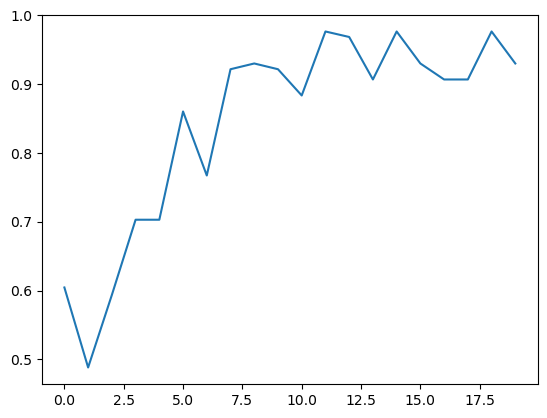

In [14]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.show()

KeyError: 'val_loss'

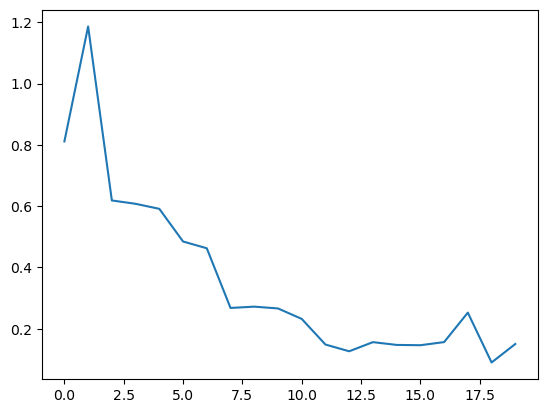

In [15]:
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.legend()
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "C:\Python\diretorio",  # Certifique-se de ter um diretório de teste separado
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

Found 87 images belonging to 2 classes.
3/3 [==============================] - 2s 339ms/step - loss: 0.1428 - accuracy: 0.9770
Acurácia no conjunto de teste: 97.70%


In [27]:
caminho_imagem = r"C:\Python\417b4cd2-2da6-40b6-ae99-2ca9f10b852f.jpg"

1/1 [==============================] - 0s 113ms/step


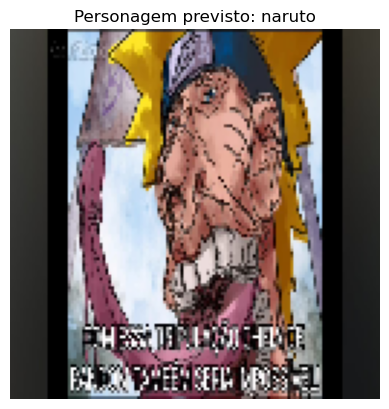

In [28]:
def prever_personagem(caminho_imagem):

    img = image.load_img(caminho_imagem, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)
    

    previsao = model.predict(img_array_expanded)
    classe_predita = np.argmax(previsao, axis=1)
    

    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    personagem = labels[classe_predita[0]]
    
    plt.imshow(img)
    plt.title(f"Personagem previsto: {personagem}")
    plt.axis('off')  # Opcional: remove os eixos
    plt.show()
    
    return personagem

caminho_imagem = r"C:\Python\417b4cd2-2da6-40b6-ae99-2ca9f10b852f.jpg"
resultado = prever_personagem(caminho_imagem)

In [39]:
model.save('modelo_naruto.h5')

In [42]:
caminho_modelo = r"C:\Python\modelo_naruto.h5"
model = load_model(caminho_modelo)